<a href="https://colab.research.google.com/github/thefinancetutor/python-tutorial-colab/blob/main/Lecture_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matrix Operations**

In [1]:
import numpy as np

We can use NumPy to multiply matrices.
A 1xN matrix is called a vector

In [2]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [3]:
a@b

32

In [4]:
b@a

32

In [5]:
np.outer(a, b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [6]:
np.outer(b, a)

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

In [7]:
c = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
c

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [8]:
c@a

array([14, 26, 38])

Why? $$1*1+2*2+3*3=14$$ $$3*1+4*2+5*3=26$$ $$5*1+6*2+7*3=38$$

In [9]:
m1 = np.array([[1, 3], [2, 4]])
m1

array([[1, 3],
       [2, 4]])

In [10]:
m2 = np.array([[0, 1], [3, 2]])
m2

array([[0, 1],
       [3, 2]])

In [11]:
m1@m2

array([[ 9,  7],
       [12, 10]])

Why? $$1*0+3*3=9$$ $$1*1+3*2=7$$ $$2*0+4*3=12$$ $$2*1+4*2=10$$

In [12]:
m3 = np.array([[2, 3, 1], [1, 4, 0]])
m4 = np.array([[1, 2], [0, 3], [2, 2]])
m5 = np.array([1, 1])
m3@m4@m5

array([19, 15])

**Portfolio Theory with Matrices**

In [13]:
!pip install yfinance

In [14]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as pdr

yf.pdr_override()
tickers=['TSLA','AMZN','C']

end = datetime.datetime.today()
start = end.replace(year = end.year - 2)

data = pdr.get_data_yahoo(tickers, start=start, end=end)['Adj Close'].resample('M').ffill().pct_change()
cov = data.cov().to_numpy()


[*********************100%***********************]  3 of 3 completed


Let's calculate a variance for a portfolio of these three stocks

In [15]:
w = np.array([0.3, 0.3, 0.4])
var_p = 12*w@cov@w
std_p = np.sqrt(var_p)
std_p.round(4)

0.4657

Now let's write a function to calculate it

In [16]:
def portfolio_std(data, weights):
  cov = data.cov().to_numpy()
  w = np.array(weights)
  var_p = 12*w@cov@w
  std_p = np.sqrt(var_p).round(4)
  return std_p

In [17]:
portfolio_std(data,w)

0.4657

**Asset Pricing Models**

Pandas data reader does work with many other datasets besides Yahoo

In [18]:
import matplotlib.pyplot as plt
import pandas_datareader
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [19]:
start='1926-01-01'
ff=pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.30 -2.87  0.22
 1926-08    2.64 -1.40  4.19  0.25
 1926-09    0.36 -1.32  0.01  0.23
 1926-10   -3.24  0.04  0.51  0.32
 1926-11    2.53 -0.20 -0.35  0.31
 ...         ...   ...   ...   ...
 2021-02    2.78  2.11  7.08  0.00
 2021-03    3.08 -2.48  7.40  0.00
 2021-04    4.93 -3.09 -0.74  0.00
 2021-05    0.29 -0.21  7.04  0.00
 2021-06    2.79  1.79 -7.70  0.00
 
 [1140 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.46  -3.75  3.12
 1928   35.39   4.41  -5.83  3.56
 1929  -19.54 -30.78  11.96  4.75
 1930  -31.23  -5.19 -12.29  2.41
 1931  -45.11   3.51 -14.32  1.07
 ...      ...    ...    ...   ...
 2016   13.30   6.53  22.86  0.20
 2017   21.51  -4.95 -13.84  0.80
 2018   -6.93  -3.20  -9.34  1.81
 2019   28.28  -6.25 -10.68  2.14
 2020   23.67  13.07 -47.20  0.44
 
 [94 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

In [20]:
ffac_df=ff[0]
ffac_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.30,-2.87,0.22
1926-08,2.64,-1.40,4.19,0.25
1926-09,0.36,-1.32,0.01,0.23
1926-10,-3.24,0.04,0.51,0.32
1926-11,2.53,-0.20,-0.35,0.31
...,...,...,...,...
2021-02,2.78,2.11,7.08,0.00
2021-03,3.08,-2.48,7.40,0.00
2021-04,4.93,-3.09,-0.74,0.00


Let's plot the factors

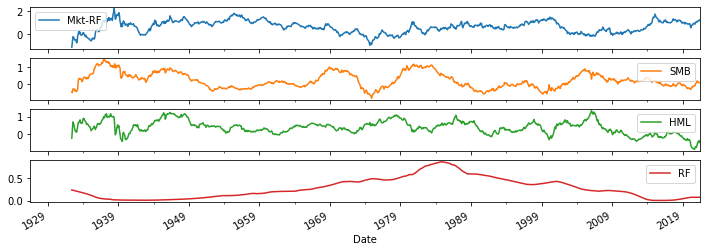

In [21]:
ffac_df.rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

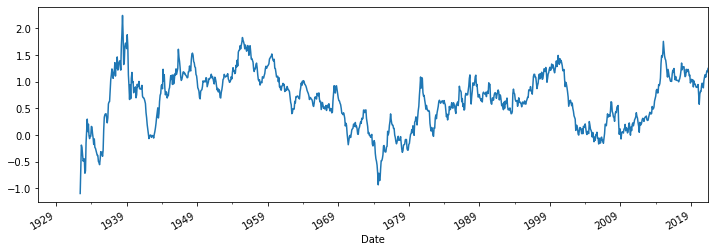

In [22]:
ffac_df['Mkt-RF'].rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

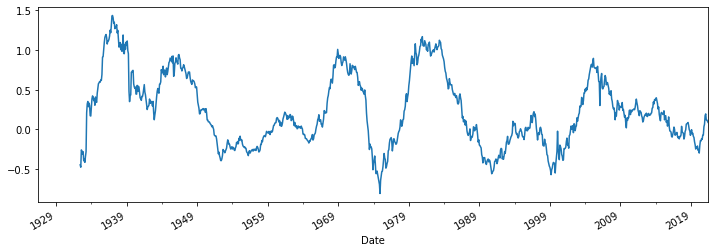

In [23]:
ffac_df['SMB'].rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

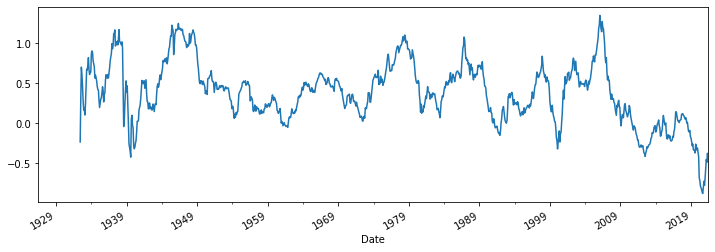

In [24]:
ffac_df['HML'].rolling(72).mean().plot(subplots=True, figsize=(12, 4))
plt.show()

Let's compute some statistics

In [25]:
ffac_df[['Mkt-RF', 'SMB', 'HML']].corr()

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.322078,0.235568
SMB,0.322078,1.000000,0.126751
HML,0.235568,0.126751,1.000000


Let's add momentum

In [26]:
ffac_mom_df=pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]
ffac_mom_df

,Mom
Date,
1927-01,0.44
1927-02,-1.32
1927-03,3.59
1927-04,4.17
1927-05,2.96
...,...
2021-02,-7.67
2021-03,-5.83
2021-04,1.01


Let's add the momentum factor to our dataset of Mkt-RF, SMB, and HML

In [27]:
df_ffac_merged = pd.merge(ffac_df,ffac_mom_df,how="inner",on='Date',sort=True,copy=True,indicator=False,validate='one_to_one')
df_ffac_merged

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.56,4.83,0.25,0.44
1927-02,4.18,-0.10,3.17,0.26,-1.32
1927-03,0.13,-1.60,-2.67,0.30,3.59
1927-04,0.46,0.43,0.60,0.25,4.17
1927-05,5.44,1.41,4.93,0.30,2.96
...,...,...,...,...,...
2021-02,2.78,2.11,7.08,0.00,-7.67
2021-03,3.08,-2.48,7.40,0.00,-5.83
2021-04,4.93,-3.09,-0.74,0.00,1.01


Weird bit of data cleaning in the Momentum factor name:

In [28]:
df_ffac_merged.rename(columns={'Mom   ':'Mom'},inplace=True)

Let's calculate factor exposures and idiosyncratic risk for a firm

In [29]:
tsla_data = pdr.get_data_yahoo('TSLA', start=start, end=end)['Adj Close'].resample('M').ffill().pct_change()
tsla_df=tsla_data.to_frame()

[*********************100%***********************]  1 of 1 completed


In [30]:
tsla_df.rename(columns={'Adj Close':'TSLA'}, inplace=True)
tsla_df

,TSLA
Date,
2010-06-30,NaN
2010-07-31,-0.163240
2010-08-31,-0.023069
2010-09-30,0.047741
2010-10-31,0.070064
...,...
2021-04-30,0.062147
2021-05-31,-0.118713
2021-06-30,0.087137


In [31]:
tsla_df.index.dtype

dtype('<M8[ns]')

In [32]:
tsla_df['str_date'] = tsla_df.index.astype(str)
tsla_df['dt_date'] = pd.to_datetime(tsla_df['str_date']).dt.strftime('%Y-%m')
tsla_df.dt_date.dtype

dtype('O')

In [33]:
df_ffac_merged.index.dtype

period[M]

In [34]:
df_ffac_merged['str_date'] = df_ffac_merged.index.astype(str)
df_ffac_merged['dt_date'] = pd.to_datetime(df_ffac_merged['str_date']).dt.strftime('%Y-%m')
df_ffac_merged.dt_date.dtype

dtype('O')

In [35]:
df_tsla_ffac_merged = pd.merge(df_ffac_merged,tsla_df,how="inner",on='dt_date',sort=True,copy=True,indicator=False,validate='one_to_one')
df_tsla_ffac_merged.drop(columns=['str_date_x','str_date_y'],inplace=True)
df_tsla_ffac_merged

,Mkt-RF,SMB,HML,RF,Mom,dt_date,TSLA
0,-5.57,-1.84,-4.52,0.01,-2.99,2010-06,NaN
1,6.93,0.18,-0.36,0.01,1.90,2010-07,-0.163240
2,-4.77,-3.02,-1.90,0.01,-0.18,2010-08,-0.023069
3,9.54,3.93,-3.23,0.01,1.35,2010-09,0.047741
4,3.88,1.07,-2.46,0.01,1.66,2010-10,0.070064
...,...,...,...,...,...,...,...
128,2.78,2.11,7.08,0.00,-7.67,2021-02,-0.148740
129,3.08,-2.48,7.40,0.00,-5.83,2021-03,-0.011207
130,4.93,-3.09,-0.74,0.00,1.01,2021-04,0.062147
131,0.29,-0.21,7.04,0.00,0.56,2021-05,-0.118713


In [36]:
df_tsla_ffac_merged['TSLA_rf']=df_tsla_ffac_merged['TSLA']*100-df_tsla_ffac_merged['RF']
df_tsla_ffac_merged.dropna(axis=0)

,Mkt-RF,SMB,HML,RF,Mom,dt_date,TSLA,TSLA_rf
1,6.93,0.18,-0.36,0.01,1.90,2010-07,-0.163240,-16.333960
2,-4.77,-3.02,-1.90,0.01,-0.18,2010-08,-0.023069,-2.316921
3,9.54,3.93,-3.23,0.01,1.35,2010-09,0.047741,4.764124
4,3.88,1.07,-2.46,0.01,1.66,2010-10,0.070064,6.996376
5,0.60,3.78,-0.95,0.01,2.54,2010-11,0.617674,61.757398
...,...,...,...,...,...,...,...,...
128,2.78,2.11,7.08,0.00,-7.67,2021-02,-0.148740,-14.874047
129,3.08,-2.48,7.40,0.00,-5.83,2021-03,-0.011207,-1.120652
130,4.93,-3.09,-0.74,0.00,1.01,2021-04,0.062147,6.214725
131,0.29,-0.21,7.04,0.00,0.56,2021-05,-0.118713,-11.871340


We have now matched our TSLA returns to our factor returns

We can now run an OLS regression similar to last time

In [37]:
from statsmodels.api import OLS
results=OLS(df_tsla_ffac_merged['TSLA_rf'],df_tsla_ffac_merged[['Mkt-RF','SMB','HML','Mom']],missing='drop').fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TSLA_rf   R-squared (uncentered):                   0.184
Model:                            OLS   Adj. R-squared (uncentered):              0.159
Method:                 Least Squares   F-statistic:                              7.235
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                    2.76e-05
Time:                        22:20:03   Log-Likelihood:                         -562.25
No. Observations:                 132   AIC:                                      1133.
Df Residuals:                     128   BIC:                                      1144.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.6332      0.395      4.140      0.000       0.853       2.414
SMB            0.6866      0.673      1.020      0.310      -0.646       2.019
HML           -1.2231      0.608     -2.012      0.046      -2.426      -0.020
Mom           -0.1086      0.532     -0.204      0.839      -1.162       0.945
==============================================================================
Omnibus:                       45.525   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.501
Skew:                           1.365   Prob(JB):                     8.30e-26
Kurtosis:                       6.681   Cond. No.                         2.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What can we learn about TSLA from this exercise?